# Supervised Learning Capstone: Mental Health in Tech

### Introduction

This data is extracted from __[Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey)__ It is from a survey that was conducted in 2014. It measures the attitudes towards mental health in the workplace. The survey includes questions about attitudes, health, and benefits availability.

### Research Interest

<b>Objective:</b> To use the variables of this dataset to predict if a person in tech has sought treatment for a mental health condition.

<b>Original Features:</b>
-  <b>Timestamp</b>: Time survey was submitted
-  <b>Age</b>: Age of Responder
-  <b>Gender</b>: Gender of Responder
-  <b>Country</b>: Country of Responder
-  <b>state</b>: State of Responder
-  <b>self_employed</b>: Are they self employed?
-  <b>family_history</b>: Is there a family history of mental health conditions?
-  <b>treatment</b>: Have you sought treatment for a mental health condition?
-  <b>work_interfere</b>: If you have a mental health condition, do you feel that it interferes with your work?
-  <b>no_employees</b>: How many employees does your company or organization have?
-  <b>remote_work</b>: Do you work remotely (outside of an office) at least 50% of the time?
-  <b>tech_company</b>: Is your employer primarily a tech company/organization?
-  <b>benefits</b>: Does your employer provide mental health benefits?
-  <b>care_options</b>: Do you know the options for mental health care your employer provides? 
-  <b>wellness_program</b>: Has your employer ever discussed mental health as part of an employee wellness program?
-  <b>seek_help</b>: Does your employer provide resources to learn more about mental health issues and how to seek help?
-  <b>anonymity</b>: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
-  <b>leave</b>: How easy is it for you to take medical leave for a mental health condition?
-  <b>mental_health_consequence</b>: Do you think that discussing a mental health issue with your employer would have negative consequences?
-  <b>phys_health_consequence</b>: Do you think that discussing a physical health issue with your employer would have negative consequences?
-  <b>coworkers</b>: Would you be willing to discuss a mental health issue with your coworkers?
-  <b>supervisor</b>: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
-  <b>mental_health_interview</b>: Would you bring up a mental health issue with a potential employer in an interview?
-  <b>phys_health_interview</b>: Would you bring up a physical health issue with a potential employer in an interview?
-  <b>mental_vs_physical</b>: Do you feel that your employer takes mental health as seriously as physical health?
-  <b>obs_consequence</b>: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
-  <b>comments</b>: Any additional notes or comments

### Modules and Data Loading

In [1]:
#Import modules
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
%matplotlib inline
plt.style.use('dark_background')
#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from kmodes.kmodes import KModes

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(("https://raw.githubusercontent.com/GenTaylor/SupervisedLearning/master/mentalhealthintechsurvey.csv"))

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Data Exploration and Cleaning

In [4]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

There are 27 features and of those features 26 are objects and 1 is an integer.

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.shape

(1259, 27)

In [7]:
#standardize all columns to lowercase for ease of use in querying
df.columns = map(str.lower, df.columns)

#verify
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
df.describe(include='all')  

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 17:33:52,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The mean of age seemed odd for something such as a technical professional so I decided to explore its values.

In [9]:
#check values of only int, age

print("Age Values")
print("Average Age: ", df['age'].mean())
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Average Age:  79428148.31135821
Minimum Age:  -1726
Maximum Age:  99999999999
Null values:  0


Age values are obviously off, and the outliers need to be fixed before any machine learning or analysis can be done.

In [10]:
#fix outlier issues for ages
def fixedage(age):
    if age>=1 and age<=99:
        return age
    else:
        return np.nan
df['age'] = df['age'].apply(fixedage)


#check age values again

print("Age Values")
print("Average Age: ", df['age'].mean())
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Average Age:  32.01913875598086
Minimum Age:  5.0
Maximum Age:  72.0
Null values:  5


#### Handling Null Values

In [11]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
age                             5
benefits                        0
gender                          0
country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
timestamp                       0
dtype: int64

In [12]:
#fill null values with avg age

df['age'].fillna(df['age'].mean(), inplace = True)


df['age']=df['age'].astype(int)

#check null again
print("Null values: ", pd.isnull(df['age']).sum())

Null values:  0


In [13]:
#drop timestamp, state, and comments

df = df.drop(['comments'], axis=1)
df = df.drop(['timestamp'], axis=1)
df = df.drop(['state'], axis=1)


In [14]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
obs_consequence                0
mental_vs_physical             0
gender                         0
country                        0
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
age                            0
dtype: int64

In [15]:
#Checking the unique values for 'work_interfere'
print("Distinct values for work_interfere:\n", set(df['work_interfere']))

Distinct values for work_interfere:
 {nan, 'Sometimes', 'Rarely', 'Often', 'Never'}


In [16]:

df['work_interfere'].fillna("Unsure",inplace = True) 
  
df['self_employed'].fillna("No",inplace = True) 
  

In [17]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

obs_consequence              0
mental_vs_physical           0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
age                          0
dtype: int64

##### Check Distinct Values

In [18]:
#Gender
print("Distinct values for gender:\n", set(df['gender']))

Distinct values for gender:
 {'woman', 'ostensibly male, unsure what that really means', 'Male', 'm', 'A little about you', 'Female', 'All', 'Femake', 'Mail', 'Male ', 'Nah', 'Man', 'M', 'fluid', 'Male-ish', 'Androgyne', 'cis-female/femme', 'Female ', 'something kinda male?', 'Agender', 'Genderqueer', 'queer/she/they', 'Make', 'Cis Female', 'Male (CIS)', 'Enby', 'Guy (-ish) ^_^', 'msle', 'maile', 'F', 'Cis Man', 'female', 'Mal', 'Neuter', 'male leaning androgynous', 'queer', 'cis male', 'f', 'p', 'non-binary', 'Malr', 'Trans woman', 'Woman', 'Trans-female', 'Female (cis)', 'Cis Male', 'femail', 'male', 'Female (trans)'}


In [19]:
#Age
print("Distinct values for age:\n", set(df['age']))

Distinct values for age:
 {5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72}


In [20]:
#Country
print("Distinct values for country:\n", set(df['country']))

Distinct values for country:
 {'Switzerland', 'Spain', 'Zimbabwe', 'China', 'Portugal', 'France', 'Ireland', 'Slovenia', 'India', 'Thailand', 'New Zealand', 'Australia', 'Italy', 'Bahamas, The', 'Nigeria', 'Croatia', 'Sweden', 'Uruguay', 'Bosnia and Herzegovina', 'Philippines', 'Poland', 'Germany', 'Costa Rica', 'United States', 'Denmark', 'Russia', 'Romania', 'South Africa', 'Canada', 'Latvia', 'Japan', 'Hungary', 'Austria', 'Singapore', 'Netherlands', 'Israel', 'Belgium', 'Finland', 'Czech Republic', 'Norway', 'Bulgaria', 'Moldova', 'Georgia', 'Brazil', 'Mexico', 'Greece', 'Colombia', 'United Kingdom'}


Gender as a distinct value seems too varied in spellings and classifications so I assume it would cause a problem. I decided to cleanse this data through strings and grouping of the values into categories.

In [21]:
#create gender groups

male= ["man","msle", "mail", "malr","male", "m", "male-ish", "maile", "mal", "male (cis)", 
       "make", "male ","cis man", "Cis Male", "cis male"]

female=["female ","cis-female/femme", "female (cis)", "femail", "cis female", "f", "female", 
        "woman",  "femake"]

other_or_trans =["something kinda male?", "queer/she/they", "p","a little about you","non-binary","nah", "all", 
        "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", 
        "guy (-ish) ^_^",  "neuter",  "queer", "ostensibly male, unsure what that really means", "trans-female","trans woman","female (trans)"]

for (row, col) in df.iterrows():

    if str.lower(col.gender) in male:
        df['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female:
        df['gender'].replace(to_replace=col.gender, value='female', inplace=True)
    
    if str.lower(col.gender) in other_or_trans:
        df['gender'].replace(to_replace=col.gender, value='other_or_trans', inplace=True)
    
    
 
#Gender
print("Distinct responses for gender:\n", set(df['gender']))

Distinct responses for gender:
 {'other_or_trans', 'female', 'male'}


In [22]:
print("Distinct values for leave:\n", set(df['leave']))

Distinct values for leave:
 {'Very easy', 'Somewhat easy', 'Somewhat difficult', "Don't know", 'Very difficult'}


<b>Ages:</b> I want to create a feature that groups the ages. I didn't want to not include certain groups such as those <18 because it is possible for someone in that age group to be working in tech and taking that survey. Their responses to age could have been typos but I did not want to take the risk of completely deleting them and changing things.

In [23]:
#Group the ages into groups
df['age'] = pd.cut(df['age'],
                         [0,18, 25, 35, 45, 55, 65, 99],
                         labels=['<18','18-24','25-34','35-44','45-54', '55-64', '65+'])

In [24]:
df.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Visualizations

First, I would like to look at the responses for each question and their relation to treatment.

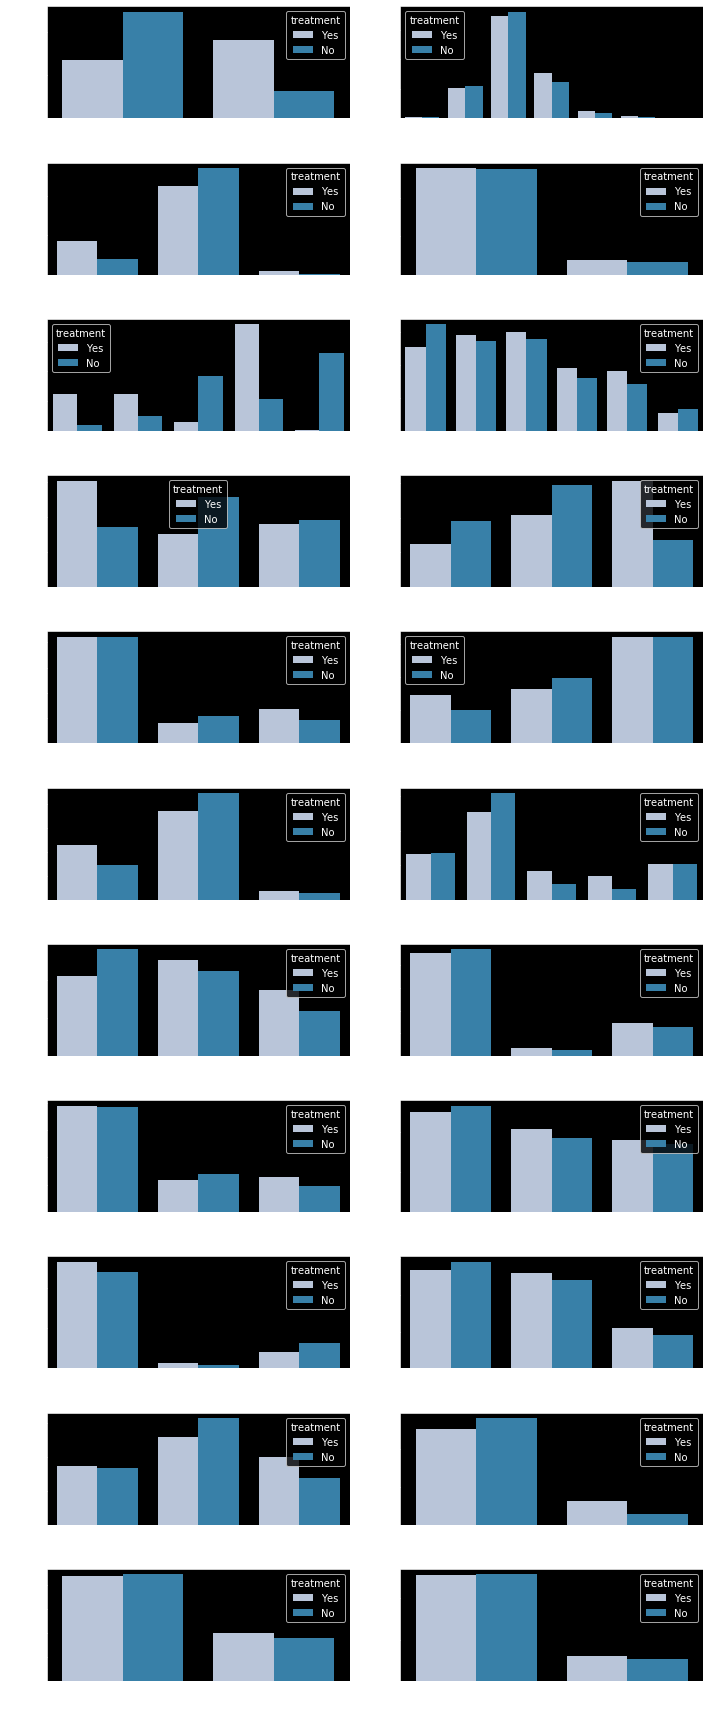

In [25]:
f, axs = plt.subplots(nrows=11, ncols=2,figsize = (10,24))
plt.style.use('dark_background')
sns.countplot(x="family_history", hue="treatment", palette="PuBu",data=df, ax=axs[0,0])
sns.countplot(x="age", hue="treatment", palette="PuBu",data=df, ax=axs[0,1])
sns.countplot(x="gender", hue="treatment", palette="PuBu",data=df, ax=axs[1,0])
sns.countplot(x="self_employed", hue="treatment", palette="PuBu",data=df, ax=axs[1,1])
sns.countplot(x="work_interfere", hue="treatment", palette="PuBu",data=df, ax=axs[2,0])
sns.countplot(x="no_employees", hue="treatment", palette="PuBu",data=df, ax=axs[2,1])
sns.countplot(x="benefits", hue="treatment", palette="PuBu",data=df, ax=axs[3,0])
sns.countplot(x="care_options", hue="treatment", palette="PuBu",data=df, ax=axs[3,1])
sns.countplot(x="wellness_program", hue="treatment", palette="PuBu",data=df, ax=axs[4,0])
sns.countplot(x="seek_help", hue="treatment", palette="PuBu",data=df, ax=axs[4,1])
sns.countplot(x="anonymity", hue="treatment", palette="PuBu",data=df, ax=axs[5,0])
sns.countplot(x="leave", hue="treatment", palette="PuBu",data=df, ax=axs[5,1])
sns.countplot(x="mental_health_consequence", hue="treatment", palette="PuBu",data=df, ax=axs[6,0])
sns.countplot(x="phys_health_consequence", hue="treatment", palette="PuBu",data=df, ax=axs[6,1])
sns.countplot(x="coworkers", hue="treatment", palette="PuBu",data=df, ax=axs[7,0])
sns.countplot(x="supervisor", hue="treatment", palette="PuBu",data=df, ax=axs[7,1])
sns.countplot(x="mental_health_interview", hue="treatment", palette="PuBu",data=df, ax=axs[8,0])
sns.countplot(x="phys_health_interview", hue="treatment", palette="PuBu",data=df, ax=axs[8,1])
sns.countplot(x="mental_vs_physical", hue="treatment", palette="PuBu",data=df, ax=axs[9,0])
sns.countplot(x="obs_consequence", hue="treatment", palette="PuBu",data=df, ax=axs[9,1])
sns.countplot(x="remote_work", hue="treatment", palette="PuBu",data=df, ax=axs[10,0])
sns.countplot(x="tech_company", hue="treatment", palette="PuBu",data=df, ax=axs[10,1])
plt.tight_layout()
plt.savefig('treatment.png')
plt.show()

In [26]:
df.to_csv('mentalhealth_clean')

In [27]:
#separate DF before corr check
df2=df

#### Imbalance Check

First we weill check the balance of the field we are looking to predict to make sure it is balanced.

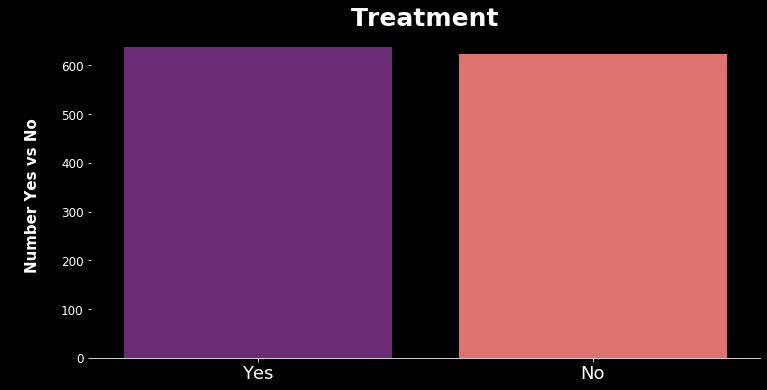

In [28]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="treatment", palette="magma", data=df2)

plt.style.use('dark_background')
plt.title("Treatment",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber Yes vs No\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('treatment.png')
plt.show()

#### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

age= LabelEncoder()
gender= LabelEncoder()
country= LabelEncoder()
state= LabelEncoder()
self_employed= LabelEncoder()
family_history= LabelEncoder()     
treatment=LabelEncoder() 
work_interfere= LabelEncoder()
no_employees= LabelEncoder()
remote_work= LabelEncoder()     
tech_company= LabelEncoder()
benefits= LabelEncoder()
care_options= LabelEncoder()
wellness_program= LabelEncoder()     
seek_help= LabelEncoder()
anonymity=LabelEncoder() 
leave= LabelEncoder()
mental_health_consequence=LabelEncoder()
phys_health_consequence= LabelEncoder()
coworkers=LabelEncoder()
supervisor=LabelEncoder()
mental_health_interview= LabelEncoder()
phys_health_interview=LabelEncoder()
mental_vs_physical= LabelEncoder()
obs_consequence=LabelEncoder()


df['age']=age.fit_transform(df['age'])
df['gender']=gender.fit_transform(df['gender']) 
df['country']=country.fit_transform(df['country']) 
df['self_employed']=self_employed.fit_transform(df['self_employed'])  
df['family_history']=family_history.fit_transform(df['family_history'])       
df['treatment']=treatment.fit_transform(df['treatment'])  
df['work_interfere']=work_interfere.fit_transform(df['work_interfere'])  
df['no_employees']=no_employees.fit_transform(df['no_employees'])  
df['remote_work']=remote_work.fit_transform(df['remote_work'])       
df['tech_company']=tech_company.fit_transform(df['tech_company'])  
df['benefits']=benefits.fit_transform(df['benefits'])  
df['care_options']=care_options.fit_transform(df['care_options'])  
df['wellness_program']=wellness_program.fit_transform(df['wellness_program'])       
df['seek_help']=seek_help.fit_transform(df['seek_help'])  
df['anonymity']=anonymity.fit_transform(df['anonymity'])  
df['leave']=leave.fit_transform(df['leave'])  
df['mental_health_consequence']=mental_health_consequence.fit_transform(df['mental_health_consequence']) 
df['phys_health_consequence']=phys_health_consequence.fit_transform(df['phys_health_consequence'])  
df['coworkers']=coworkers.fit_transform(df['coworkers'])  
df['supervisor']=supervisor.fit_transform(df['supervisor']) 
df['mental_health_interview']=mental_health_interview.fit_transform(df['mental_health_interview'])  
df['phys_health_interview']=phys_health_interview.fit_transform(df['phys_health_interview']) 
df['mental_vs_physical']=mental_vs_physical.fit_transform(df['mental_vs_physical'])  
df['obs_consequence']=obs_consequence.fit_transform(df['obs_consequence']) 



In [30]:
df.describe()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1.193805,0.820492,37.792693,0.115965,0.390786,0.505957,2.335981,2.783161,0.298650,0.818904,...,0.647339,1.410643,0.853058,0.831612,0.97220,1.097697,0.870532,0.718030,0.814932,0.146148
std,0.887428,0.425192,13.320224,0.320310,0.488121,0.500163,1.373980,1.740247,0.457848,0.385251,...,0.908106,1.508507,0.767905,0.486954,0.62029,0.844407,0.427490,0.723718,0.834414,0.353395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,0.000000
max,6.000000,2.000000,47.000000,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000


In [31]:
df['age'].value_counts()

1    706
2    277
0    210
3     42
4     13
6     10
5      1
Name: age, dtype: int64

In [32]:
df['country'].value_counts()

45    751
44    185
7      72
17     45
21     27
28     27
0      21
15     13
20     10
29      8
33      7
23      7
41      7
42      7
3       6
5       6
39      6
22      5
37      4
6       4
36      3
1       3
14      3
26      3
18      2
11      2
34      2
13      2
9       2
10      1
8       1
12      1
4       1
2       1
43      1
35      1
16      1
19      1
40      1
46      1
24      1
25      1
27      1
38      1
30      1
31      1
32      1
47      1
Name: country, dtype: int64

Looking the distribution of country, I've decided to drop it as well, considering most of the countries do not have many participants, it really does not have much of an effect on the modeling. 

In [33]:
df = df.drop(['country'], axis=1)

#### Check Correlations

Text(0.5, 1, 'Mental Health in Tech Survey Correlations')

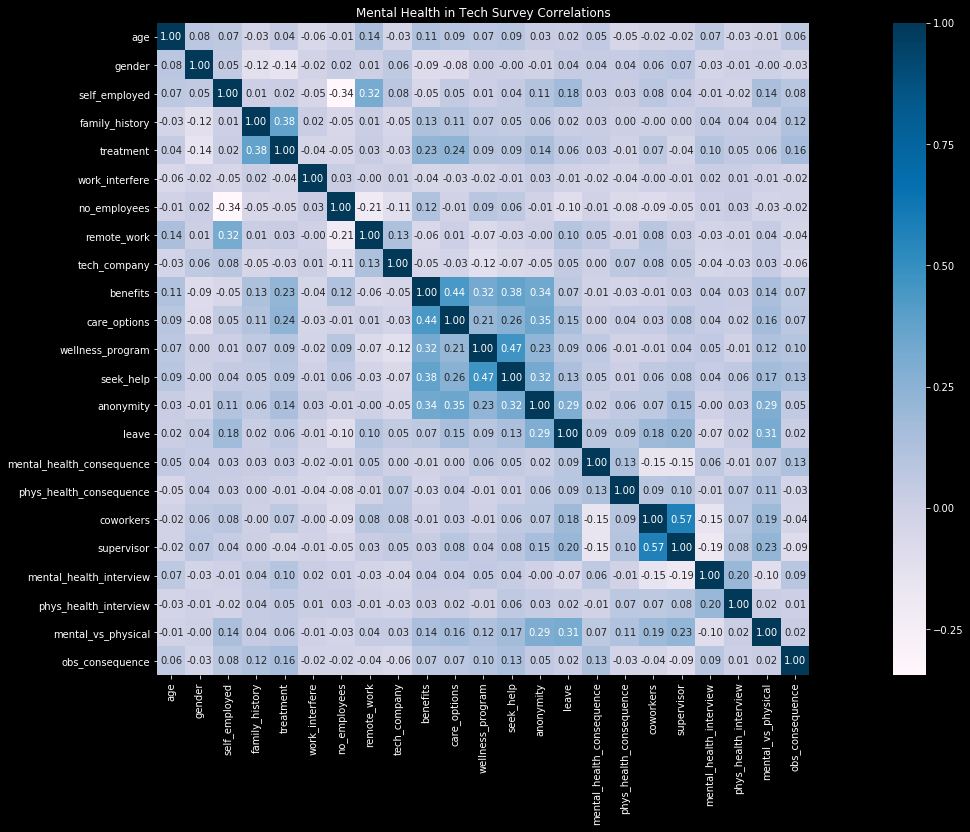

In [34]:
#Correlations

plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),cmap = 'PuBu',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Mental Health in Tech Survey Correlations')

In [35]:
corr=df.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.377918
care_options                 0.236578
benefits                     0.226140
obs_consequence              0.156972
anonymity                    0.142889
mental_health_interview      0.098413
wellness_program             0.094713
seek_help                    0.089935
coworkers                    0.068433
mental_vs_physical           0.062642
leave                        0.061549
phys_health_interview        0.051859
age                          0.042170
mental_health_consequence    0.030221
remote_work                  0.026937
self_employed                0.020493
phys_health_consequence     -0.008933
tech_company                -0.031525
work_interfere              -0.035881
supervisor                  -0.036199
no_employees                -0.050114
gender                      -0.144482
Name: treatment, dtype: float64

From the correlation commands executed I see where there may be strong correlations, and I have an idea of which columns and values would be of high importance.

#### A specified research question your model addresses

My model will address the question of whether the survey takers' answers to any of the questions can be used to predict whether they have sought treatment for mental health conditions. I will test multiple models and compare them against each other and determine which best predicts the answers to my question.


#### Setup for Modeling

In [36]:
#Setup X and y
X= df2[['family_history','age','benefits','gender',
       'care_options', 'work_interfere', 'leave', 'anonymity' ]]
#labelencode treament
df2['treatment']=treatment.fit_transform(df2['treatment'])  
y=df2['treatment']


In [37]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(X)


In [38]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)


### Modeling

#### How you chose your model specification and what alternatives you compared it to?

I wanted to look at four models and compare how they worked with this data. I decided to use the first model that I learned that could be applied for categorical features, logistic regression, and three other models (Random Forest, Support Vector Machines, and Gradient Boost) that I was familiar with, and thought would preform well. 

Initially I wanted to test these models in their vanilla state (but with the same random_state) before I added any parameters, just to see how they performed with default settings. 



In [39]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['No Treatment','Treatment']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()





LogisticRegression Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 83.3333%
Cross validation scores: 0.8365528236322971
Log Loss: 0.38871714264656876


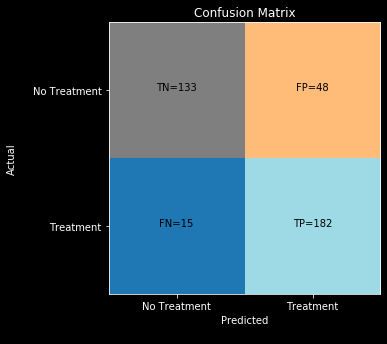





RandomForestClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 82.8042%
Cross validation scores: 0.8331321151896481
Log Loss: 0.4081049615479342


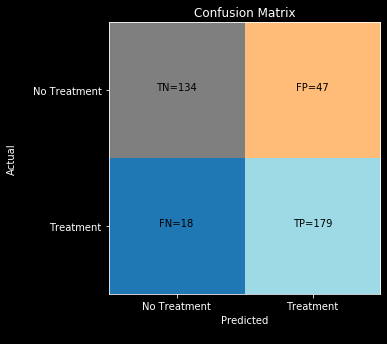





SVC Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 82.5397%
Cross validation scores: 0.8331398543490206
Log Loss: 0.4390333945555297


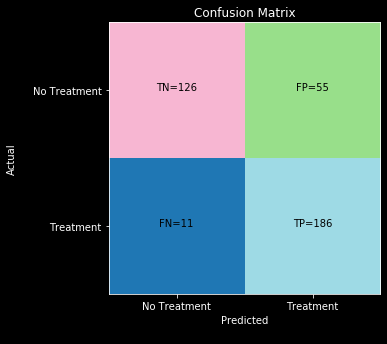





GradientBoostingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 82.8042%
Cross validation scores: 0.8229473814554263
Log Loss: 0.38781084151911605


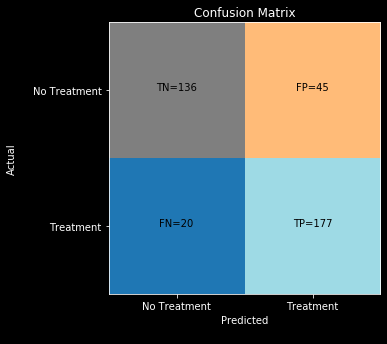





AdaBoostClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 83.0688%
Cross validation scores: 0.8342775107767794
Log Loss: 0.6614794574011981


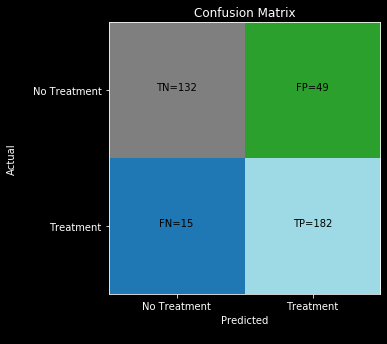





BaggingClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 79.3651%
Cross validation scores: 0.7854821109331104
Log Loss: 0.6536743149357163


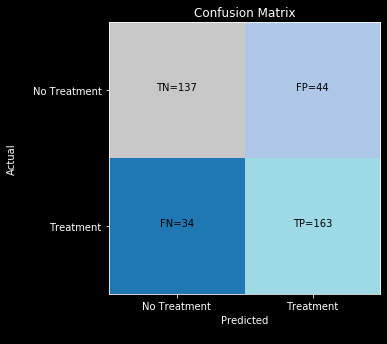





LGBMClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 79.1005%
Cross validation scores: 0.7854743717737379
Log Loss: 0.6933171833527462


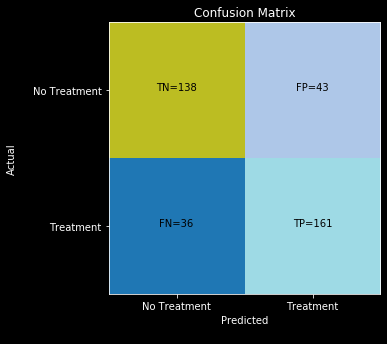





XGBClassifier Results:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Accuracy: 81.7460%
Cross validation scores: 0.826333263680899
Log Loss: 0.4221597359954286


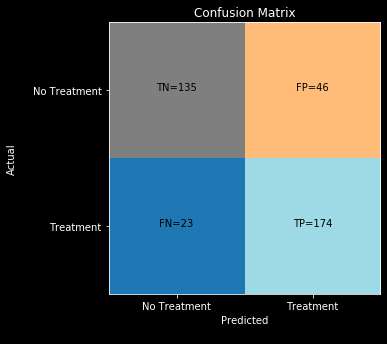

****************************************


In [43]:
#Try modeling using  different classification models
#note this is a revised model 
#paramenter tuning was done to obtain these parameters in a previous version
classifiers = [
    LogisticRegression(C= 1, penalty= 'l1', random_state=42),
    RandomForestClassifier(criterion= 'entropy', max_depth= 10, 
                           max_features= 'log2',min_samples_split= 8, 
                           n_estimators= 300, random_state=42),
    SVC(probability=True,C=1000, gamma=0.001, kernel='rbf', random_state=42),
    GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, max_features= 1.0,
                               min_samples_leaf= 100, n_estimators= 100, random_state=42),
    AdaBoostClassifier( n_estimators=500, learning_rate=0.05, random_state=42),
    BaggingClassifier(max_features=X.shape[1], n_estimators=500, random_state=42),
    LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42),
    XGBClassifier(learning_rate=0.05, n_estimators=500, subsample= 1,random_state = 42,
                        gamma = 1, max_depth=40)]
    
    


#putting results in df
cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, X_train, y_train, cv=3))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(X_test)
    logloss = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(y_test, y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)
    f1s=f1_score(y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=cols)
    results = results.append(results_final)
    
print("*"*40)

In [44]:
print("Results Shape",results.shape)
results.head(10)

Results Shape (8, 9)


,Classifier,Accuracy,Log Loss,Cross Val,Recall,Roc Auc,F1,False Positive Rate,Error Rate
0,LogisticRegression,83.333,0.389,83.655,92.386,82.933,85.246,26.519,16.667
0,RandomForestClassifier,82.804,0.408,83.313,90.863,82.448,84.634,25.967,17.196
0,SVC,82.540,0.439,83.314,94.416,82.015,84.932,30.387,17.460
0,GradientBoostingClassifier,82.804,0.388,82.295,89.848,82.493,84.487,24.862,17.196
0,AdaBoostClassifier,83.069,0.661,83.428,92.386,82.657,85.047,27.072,16.931
0,BaggingClassifier,79.365,0.654,78.548,82.741,79.216,80.693,24.309,20.635
0,LGBMClassifier,79.101,0.693,78.547,81.726,78.984,80.299,23.757,20.899
0,XGBClassifier,81.746,0.422,82.633,88.325,81.455,83.453,25.414,18.254


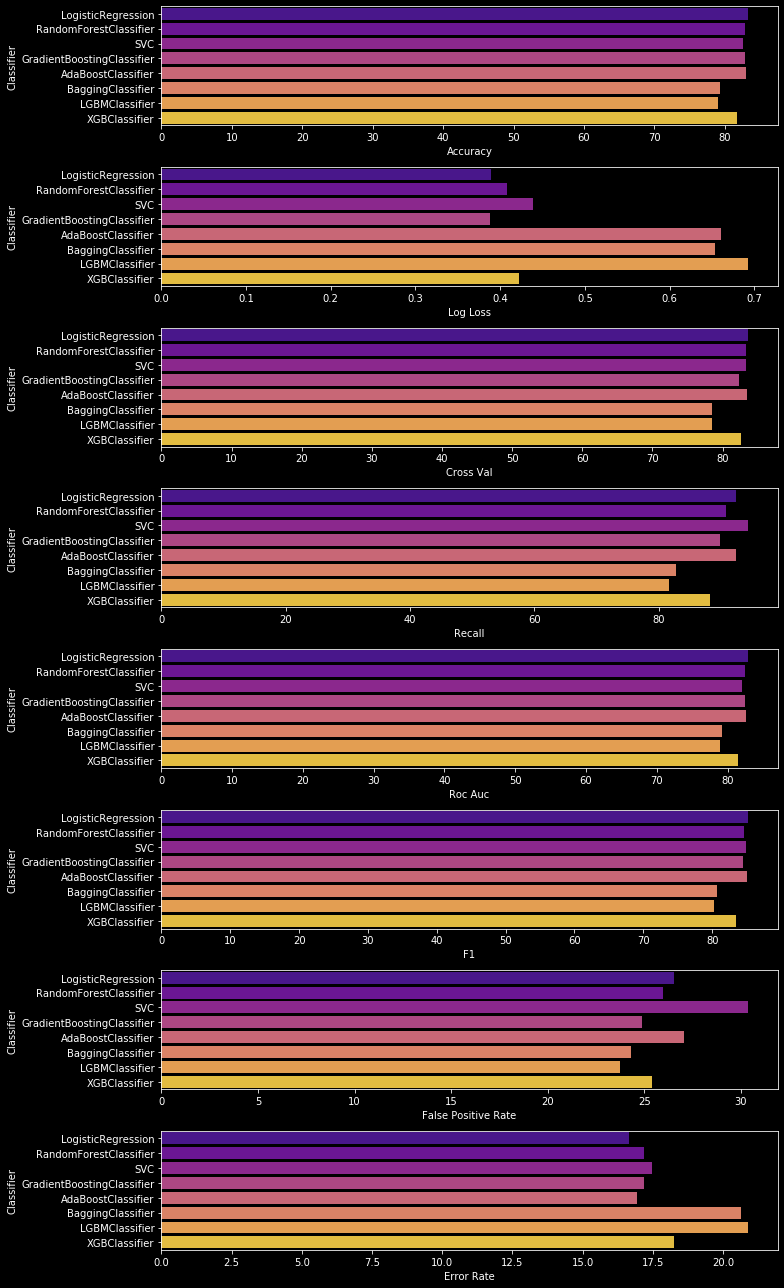

In [45]:
#Visualize scores for all model

fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
sns.barplot(x='Accuracy', y='Classifier', data=results, palette='plasma', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=results, palette='plasma', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=results, palette='plasma', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=results, palette='plasma', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=results, palette='plasma', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=results, palette='plasma', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=results, palette='plasma', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=results, palette='plasma', ax=ax[7])

plt.tight_layout()
plt.show()

#### The practical uses of your model for an audience of interest:



This model is practical for at least two groups, employers and health insurance companies. It can help companies who are trying to improve the mental health of their workers. Employers can use these results to help boost the mental health of employees which can improve performance. They can also use it as a way to recruit new employees. Knowing that a company cares about the mental health of its employees is a want of many who are looking for employment.

It can help health insurance companies learn how to better market their insurance to companies. Health insurance companies can use this information to better understand how to sell their policies to companies. Once they have done their research on the company they're pitching to and they better understand the needs of the organization, they can determine if they should be selling policies with a heavy focus on mental health and well-being or not.


#### Any weak points or shortcomings of your model



My model seems to have limited accuracy. While accurate for the most part, the accuracy is only 83%. Also, it is dependent on the answers to the questions being honest and accurate themselves. The data also required some cleaning that in some cases resulted in judgement calls that could have gone either way. Cross-validation also wasn't as strong or consistent as I'd like but it still averaged out. 



#### -Genesis Taylor